In [ ]:
! pip install xgboost

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score


In [93]:
train_df = pd.read_csv('./airbnb_data/train_users_2.csv')
test_df = pd.read_csv('./airbnb_data/test_users.csv')

In [3]:
train_df.head()


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
test_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [70]:
train_df.shape, test_df.shape

((213451, 16), (62096, 15))

In [ ]:
train_labels = train_df.country_destination.values


# test_labels = test_df.country_destination.values # .values returns an array
train_df = train_df.drop(['country_destination'], axis=1)

In [111]:
id_test = test_df.id

### For EDA

In [97]:
df_all = pd.concat((train_df, test_df), axis = 0, ignore_index= True)

In [98]:
for column in df_all.columns:
    nan_count = df_all[column].isna().sum()
    print(f"NaN count in column '{column}': {nan_count}")

NaN count in column 'id': 0
NaN count in column 'date_account_created': 0
NaN count in column 'timestamp_first_active': 0
NaN count in column 'date_first_booking': 186639
NaN count in column 'gender': 0
NaN count in column 'age': 116866
NaN count in column 'signup_method': 0
NaN count in column 'signup_flow': 0
NaN count in column 'language': 0
NaN count in column 'affiliate_channel': 0
NaN count in column 'affiliate_provider': 0
NaN count in column 'first_affiliate_tracked': 6085
NaN count in column 'signup_app': 0
NaN count in column 'first_device_type': 0
NaN count in column 'first_browser': 0


In [9]:
df_all.gender.value_counts()

gender
-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: count, dtype: int64

In [10]:
df_all.language.value_counts()

language
en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: count, dtype: int64

In [11]:
df_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [12]:
df_all[df_all['age'] <= 15] = np.nan
df_all[df_all['age'] >= 100] = np.nan

C:\Users\sachi\AppData\Local\Temp\ipykernel_6920\2835969379.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_gender, x='gender', palette='pastel')


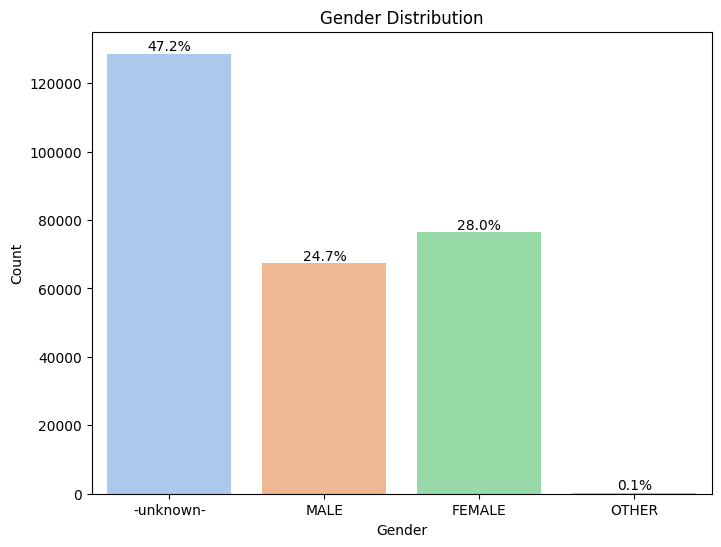

In [13]:
df_gender = pd.DataFrame(df_all['gender'])
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_gender, x='gender', palette='pastel') 
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
total = df_all['gender'].count()

# annotate the bars with fmt from matplotlib v3.7.0
for container_index in range(len(ax.containers)):
    ax.bar_label(ax.containers[container_index], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()


C:\Users\sachi\AppData\Local\Temp\ipykernel_6920\4091337625.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data=df_destination, x='country_destination', palette='pastel')


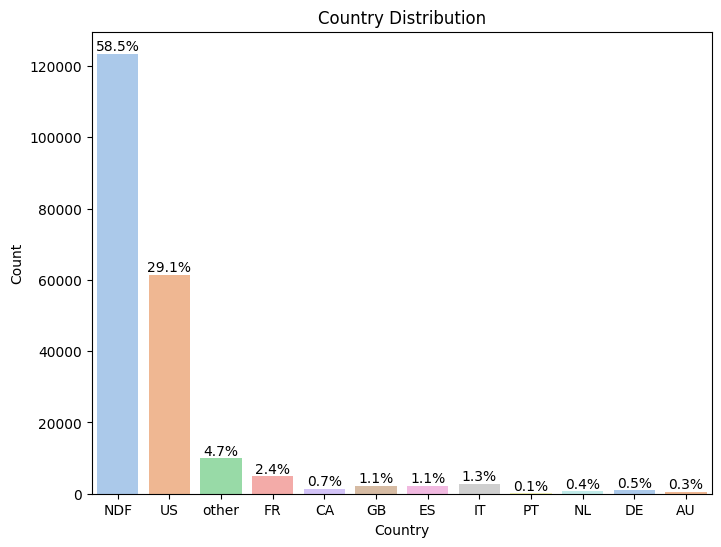

In [14]:
df_destination = pd.DataFrame(df_all['country_destination'])
total = df_all['country_destination'].count()
plt.figure(figsize=(8, 6))
ax =sns.countplot(data=df_destination, x='country_destination', palette='pastel') 
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
for container_index in range(len(ax.containers)):
    ax.bar_label(ax.containers[container_index], fmt=lambda x: f'{(x/total)*100:0.1f}%')

# Show plot
plt.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_6920\3667101494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_year, x='date_account_created', palette='pastel')


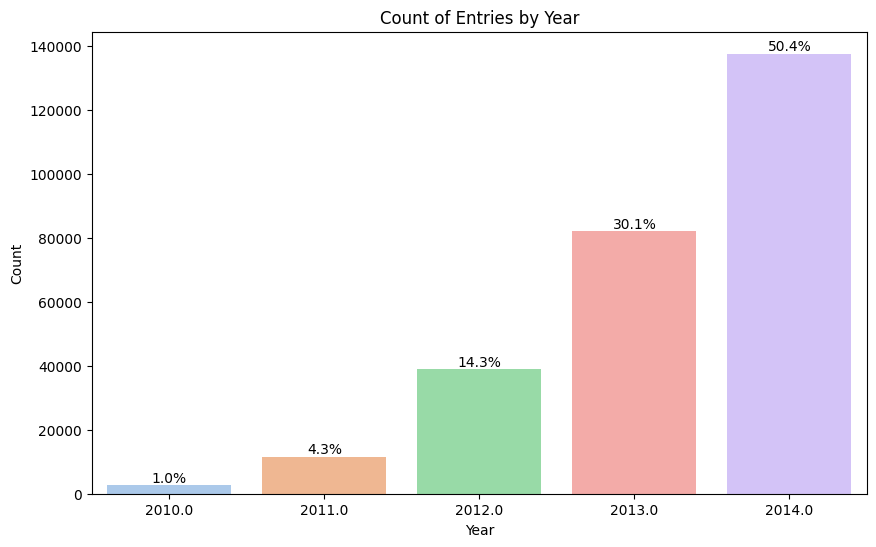

In [15]:
df_year = pd.DataFrame(pd.to_datetime(df_all['date_account_created']).dt.year)

total = df_all['date_account_created'].count()

plt.figure(figsize=(10, 6)) 
ax = sns.countplot(data=df_year, x='date_account_created', palette='pastel') 
plt.title('Count of Entries by Year')
plt.xlabel('Year')
plt.ylabel('Count')
for container_index in range(len(ax.containers)):
    ax.bar_label(ax.containers[container_index], fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

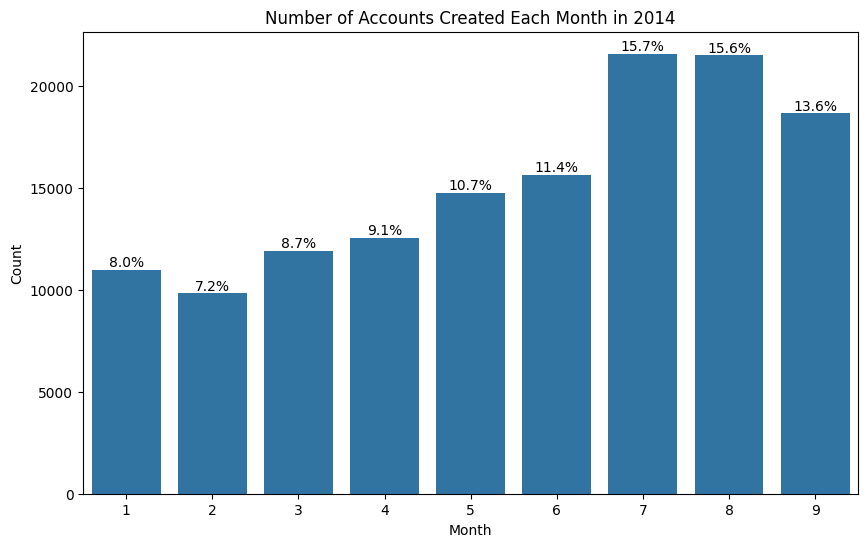

In [16]:
df_year = df_all[pd.to_datetime(df_all['date_account_created']).dt.year == 2014]

# pd.to_datetime(df_year['date_account_created'])
# Extract month from the 'date_account_created' column
df_2014 = pd.DataFrame(pd.to_datetime(df_year['date_account_created']).dt.month)
# df_2014.date_account_created.describe()
total = df_2014['date_account_created'].count()

# Plotting
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(data=df_2014, x='date_account_created')
count_plot.set_title('Number of Accounts Created Each Month in 2014')
count_plot.set_xlabel('Month')
count_plot.set_ylabel('Count')
for container_index in range(len(count_plot.containers)):
    count_plot.bar_label(count_plot.containers[container_index], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

<Figure size 1000x600 with 0 Axes>

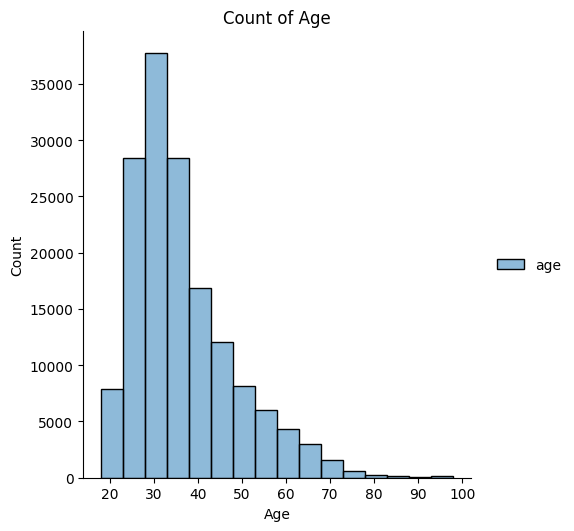

In [17]:
df_age = pd.DataFrame(df_all.age.dropna())

plt.figure(figsize=(10, 6)) 
sns.displot(df_age, kde = False, color ='blue', bins = np.arange(18,100,5)) 
plt.title('Count of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

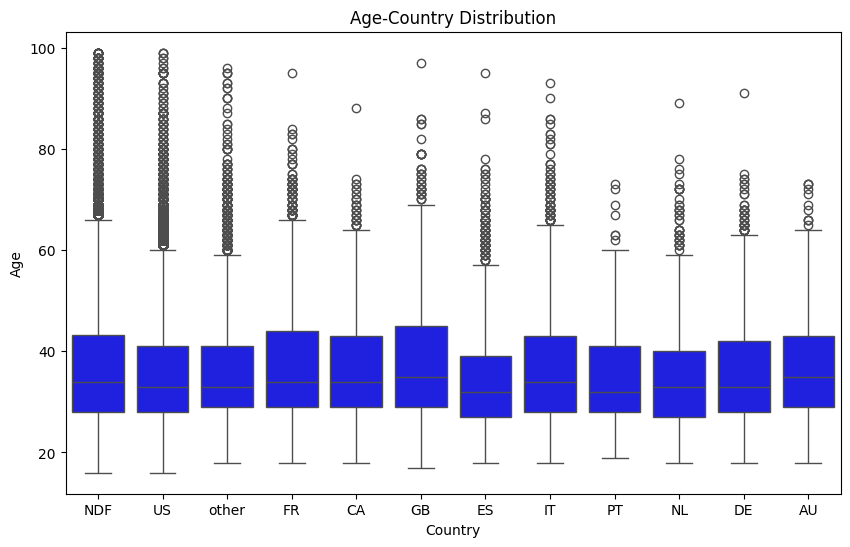

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x='country_destination', y='age', color='blue')
plt.title('Age-Country Distribution')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

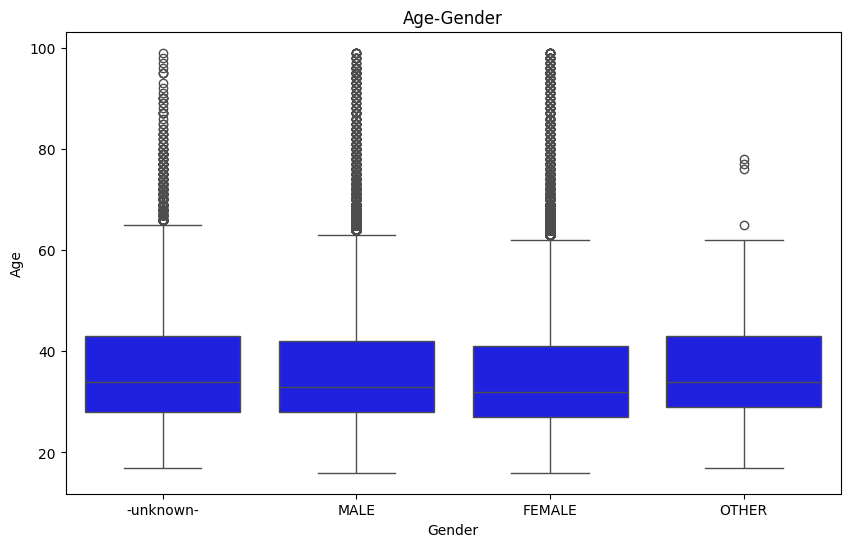

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x='gender', y='age', color='blue')
plt.title('Age-Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

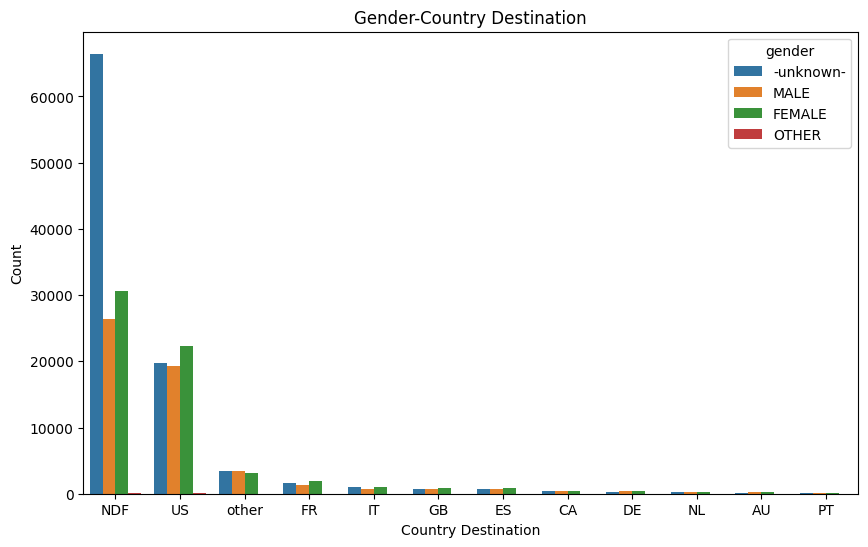

In [20]:
plt.figure(figsize=(10,6))
order1 = df_all.country_destination.value_counts().index

sns.countplot(data=df_all, x='country_destination', order=order1, hue='gender')
plt.title('Gender-Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.show()


In [41]:
df_t= (pd.to_datetime(df_all['date_first_booking']) - pd.to_datetime(df_all['date_account_created'])).dt.days
df_t
# Plot histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df_t['time_delta'].dropna(), bins=30, color='skyblue', edgecolor='black')
# plt.xlabel('Time Delta (Days)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Time Delta between Account Creation and First Booking')
# plt.grid(True)
# plt.show()
# pd.to_datetime(df_all['date_account_created']).dt.days

0           NaN
1           NaN
2         -57.0
3         278.0
4        -208.0
          ...  
275542      NaN
275543      NaN
275544      NaN
275545      NaN
275546      NaN
Length: 275547, dtype: float64

In [99]:
df_all = df_all.drop(['id', 'date_first_booking'], axis=1)

In [100]:
# train_df = train_df.drop('country_destination', axis=1)
#date_account_created

dac = np.vstack(df_all.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df_all['dac_year'] = dac[:,0]
df_all['dac_month'] = dac[:,1]
df_all['dac_day'] = dac[:,2]
df_all = df_all.drop(['date_account_created'], axis=1)

#timestamp_first_active

tfa = np.vstack(df_all.timestamp_first_active.astype(str).apply(lambda x: list(map(int, [x[:4],x[4:6],x[6:8],x[8:10],x[10:12],x[12:14]]))).values)
df_all['tfa_year'] = tfa[:,0]
df_all['tfa_month'] = tfa[:,1]
df_all['tfa_day'] = tfa[:,2]
df_all = df_all.drop(['timestamp_first_active'], axis=1)


In [101]:
df_all

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,2014,9,30
275543,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,2014,9,30
275544,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,2014,9,30
275545,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,2014,9,30


In [102]:
for column in df_all.columns:
    nan_count = df_all[column].isna().sum()
    print(f"NaN count in column '{column}': {nan_count}")

NaN count in column 'gender': 0
NaN count in column 'age': 116866
NaN count in column 'signup_method': 0
NaN count in column 'signup_flow': 0
NaN count in column 'language': 0
NaN count in column 'affiliate_channel': 0
NaN count in column 'affiliate_provider': 0
NaN count in column 'first_affiliate_tracked': 6085
NaN count in column 'signup_app': 0
NaN count in column 'first_device_type': 0
NaN count in column 'first_browser': 0
NaN count in column 'dac_year': 0
NaN count in column 'dac_month': 0
NaN count in column 'dac_day': 0
NaN count in column 'tfa_year': 0
NaN count in column 'tfa_month': 0
NaN count in column 'tfa_day': 0


In [103]:
# imputation -1 for ages NaN
df_all['age'].fillna(-1, inplace=True)

# imputation most frequent 'untracked' for first_affiliate_tracked
df_all['first_affiliate_tracked'].fillna(df_all.first_affiliate_tracked.value_counts().index[0], inplace=True)

In [104]:
to_le = [ i for i, t in zip(df_all.dtypes.index, df_all.dtypes.values)  if t == 'O']

In [105]:
le = LabelEncoder()
for ri in to_le: # ri: replaced by integer
    le.fit(df_all[ri])   # takes labels and assigns each to a integer,
    df_all[ri] = le.transform(df_all[ri])
    print(le.classes_)
    print(le.transform(le.classes_))
    print("------")

['-unknown-' 'FEMALE' 'MALE' 'OTHER']
[0 1 2 3]
------
['basic' 'facebook' 'google' 'weibo']
[0 1 2 3]
------
['-unknown-' 'ca' 'cs' 'da' 'de' 'el' 'en' 'es' 'fi' 'fr' 'hr' 'hu' 'id'
 'is' 'it' 'ja' 'ko' 'nl' 'no' 'pl' 'pt' 'ru' 'sv' 'th' 'tr' 'zh']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
------
['api' 'content' 'direct' 'other' 'remarketing' 'sem-brand'
 'sem-non-brand' 'seo']
[0 1 2 3 4 5 6 7]
------
['baidu' 'bing' 'craigslist' 'daum' 'direct' 'email-marketing' 'facebook'
 'facebook-open-graph' 'google' 'gsp' 'meetup' 'naver' 'other' 'padmapper'
 'vast' 'wayn' 'yahoo' 'yandex']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
------
['linked' 'local ops' 'marketing' 'omg' 'product' 'tracked-other'
 'untracked']
[0 1 2 3 4 5 6]
------
['Android' 'Moweb' 'Web' 'iOS']
[0 1 2 3]
------
['Android Phone' 'Android Tablet' 'Desktop (Other)' 'Mac Desktop'
 'Other/Unknown' 'SmartPhone (Other)' 'Windows Desktop' 'iPad' 'iPhone']
[0 1 2 3 4 5 6 7 

In [106]:
vals = df_all.values
X = vals[:train_df.shape[0]]
le = LabelEncoder()
y = le.fit_transform(train_labels)   
X_test = vals[train_df.shape[0]:]

In [121]:
X.shape, y.shape

((213451, 17), (213451,))

In [108]:
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)                  
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [137]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
y

In [122]:
X_test.shape

(62096, 17)

In [113]:
y_pred = xgb.predict_proba(X_test)

In [123]:
y_pred.shape

(62096, 12)

In [114]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

In [115]:
#Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('sub.csv',index=False)

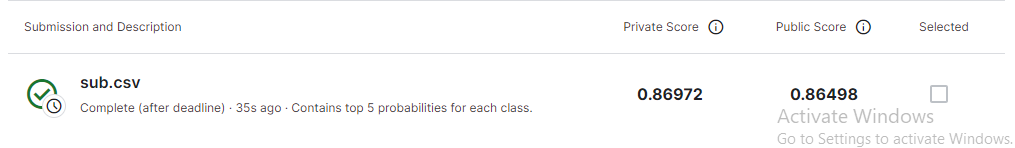